## 10.2 Term Project: 

### Milestone 1: Data Selection and EDA

#### Term Project Narrative: Assessing Employee Attrition (IBM)

For this term project, I will be assessing employee attrition, specifically utilizing an IBM employee dataset. 

Employees are the backbone of any organization, company, or business. Therefore, an organization's performance and outcomes are heavily dependent upon the quality of employees and retaining said employees. In particular, certain challenges that an organization may face (in this specific use-case, IBM) due to employee attrition are:

* Additional costs of both money and time to obtain and train new employees.
* Costs already spent (money and time) on employees who are no longer with the company.
* Loss of experienced employees/employees who are familiar with the organization and its respective business sectors/industries, products, processes, etc.
* Impacts on profits.

- Problem: Overall, the main problem I would like to solve/question I would like to answer here is: what factors or variables contribute to employee attrition?

    * Additionally, a follow up problem/question includes:
        1. Can predictions be made as to which employees are at the highest risk for attrition based upon those variables?

* Organization: The specific organization that would benefit from this would be IBM, given this is an IBM specific dataset. More broadly, a variety of businesses and organizations could benefit from an employee attrition study and analysis (especially during this economic time and the "Great Resignation" that is currently taking place in our COVID-era world).
* Target for model: Attrition value (a classification variable: yes = employee is no longer with the organization, no = employee is still present at the organization).
* Predictor for model: A variety of variables will be used as predictors or independent variables. The variables I decide to choose will be dependent upon my findings following EDA.

#### Main Data Source/Selection

1. IBM HR Analytics Employee Attrition & Performance: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

#### Graphical Analysis

In [55]:
## Import necessary libraries.

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
import hvplot
import hvplot.pandas

In [56]:
## Read the data/create a dataframe.

employee_df = pd.read_csv(r"C:\Users\Madeleine's PC\Documents\Madeleine\Documents\Bellevue University Courses\Masters in DS\BU DSC550\Term Project\IBM Employee Attrition Data.csv", converters={'Attrition': lambda x: int(x == 'Yes')})

In [57]:
## View data.

employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [58]:
## Obtain more info on data.

employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [59]:
## Obtain data types.

employee_df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [60]:
## View description of data.

employee_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [61]:
## Convert target variable (Attrition) into a categorical variable.
## This will make it simpler to graph this variable.

## employee_df["Attrition"] = employee_df["Attrition"].astype('category')

## Check type.
## employee_df.dtypes

#### Graphical Analysis 1: Histogram of Attrition Variable, Overall Attrition

##### Update: 
For my attrition histogram, I have updated it to include a legend with labels, and I have amended the labels more appropriately (size, label name, etc.).

Text(-1.6999999999999957, 0.5, 'Counts')

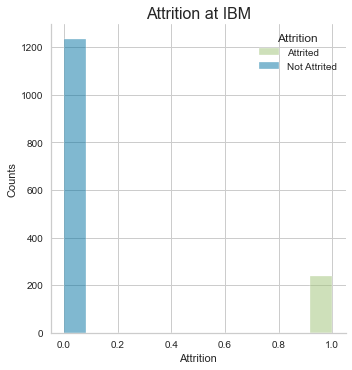

In [62]:
## Plot for attrition.

sns.displot(employee_df, x="Attrition", hue="Attrition", element="bars", legend = None)
plt.legend(title='Attrition', loc='upper right', labels=['Attrited', 'Not Attrited'])
plt.title('Attrition at IBM',fontsize=16)
plt.xlabel('Attrition')
plt.ylabel('Counts')

This graphical analysis is exploring attrition - more specifically, those who have experienced attrition (the "attrited" category) and those who have not (the "not attrited" category). From this bar graph/histogram, I can see that the counts for those who have experienced attrition are lower than those who have not. 

#### Graphical Analysis 2: Variable Correlation Heat Map

In [63]:
## Calculate the correlation matrix

## Convert Attrition yes/no to 1/0, respectively.
## This will make it easier to assess numerical correlations.
## employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 0 if x=='No' else 1)
## employee_df['Attrition'] = pd.to_numeric(employee_df['Attrition'])
## employee_df

In [64]:
## employee_df.dtypes

##### Update:

For my correlation heatmap matrix, I have updated this section to only include one of these heatmaps. Initially, I had a preliminary one that was smaller, and then took that a step further to improve upon the smaller one, but I have elected to just go with the final one that is the best portrayal and easiest to read.

C:\Users\MADELE~1\AppData\Local\Temp/ipykernel_31376/749817118.py:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("coolwarm").copy()
  color.set_bad('pink')


Text(0.5, 1.0, 'Correlation Matrix of All Numeric Variables & Attrition')

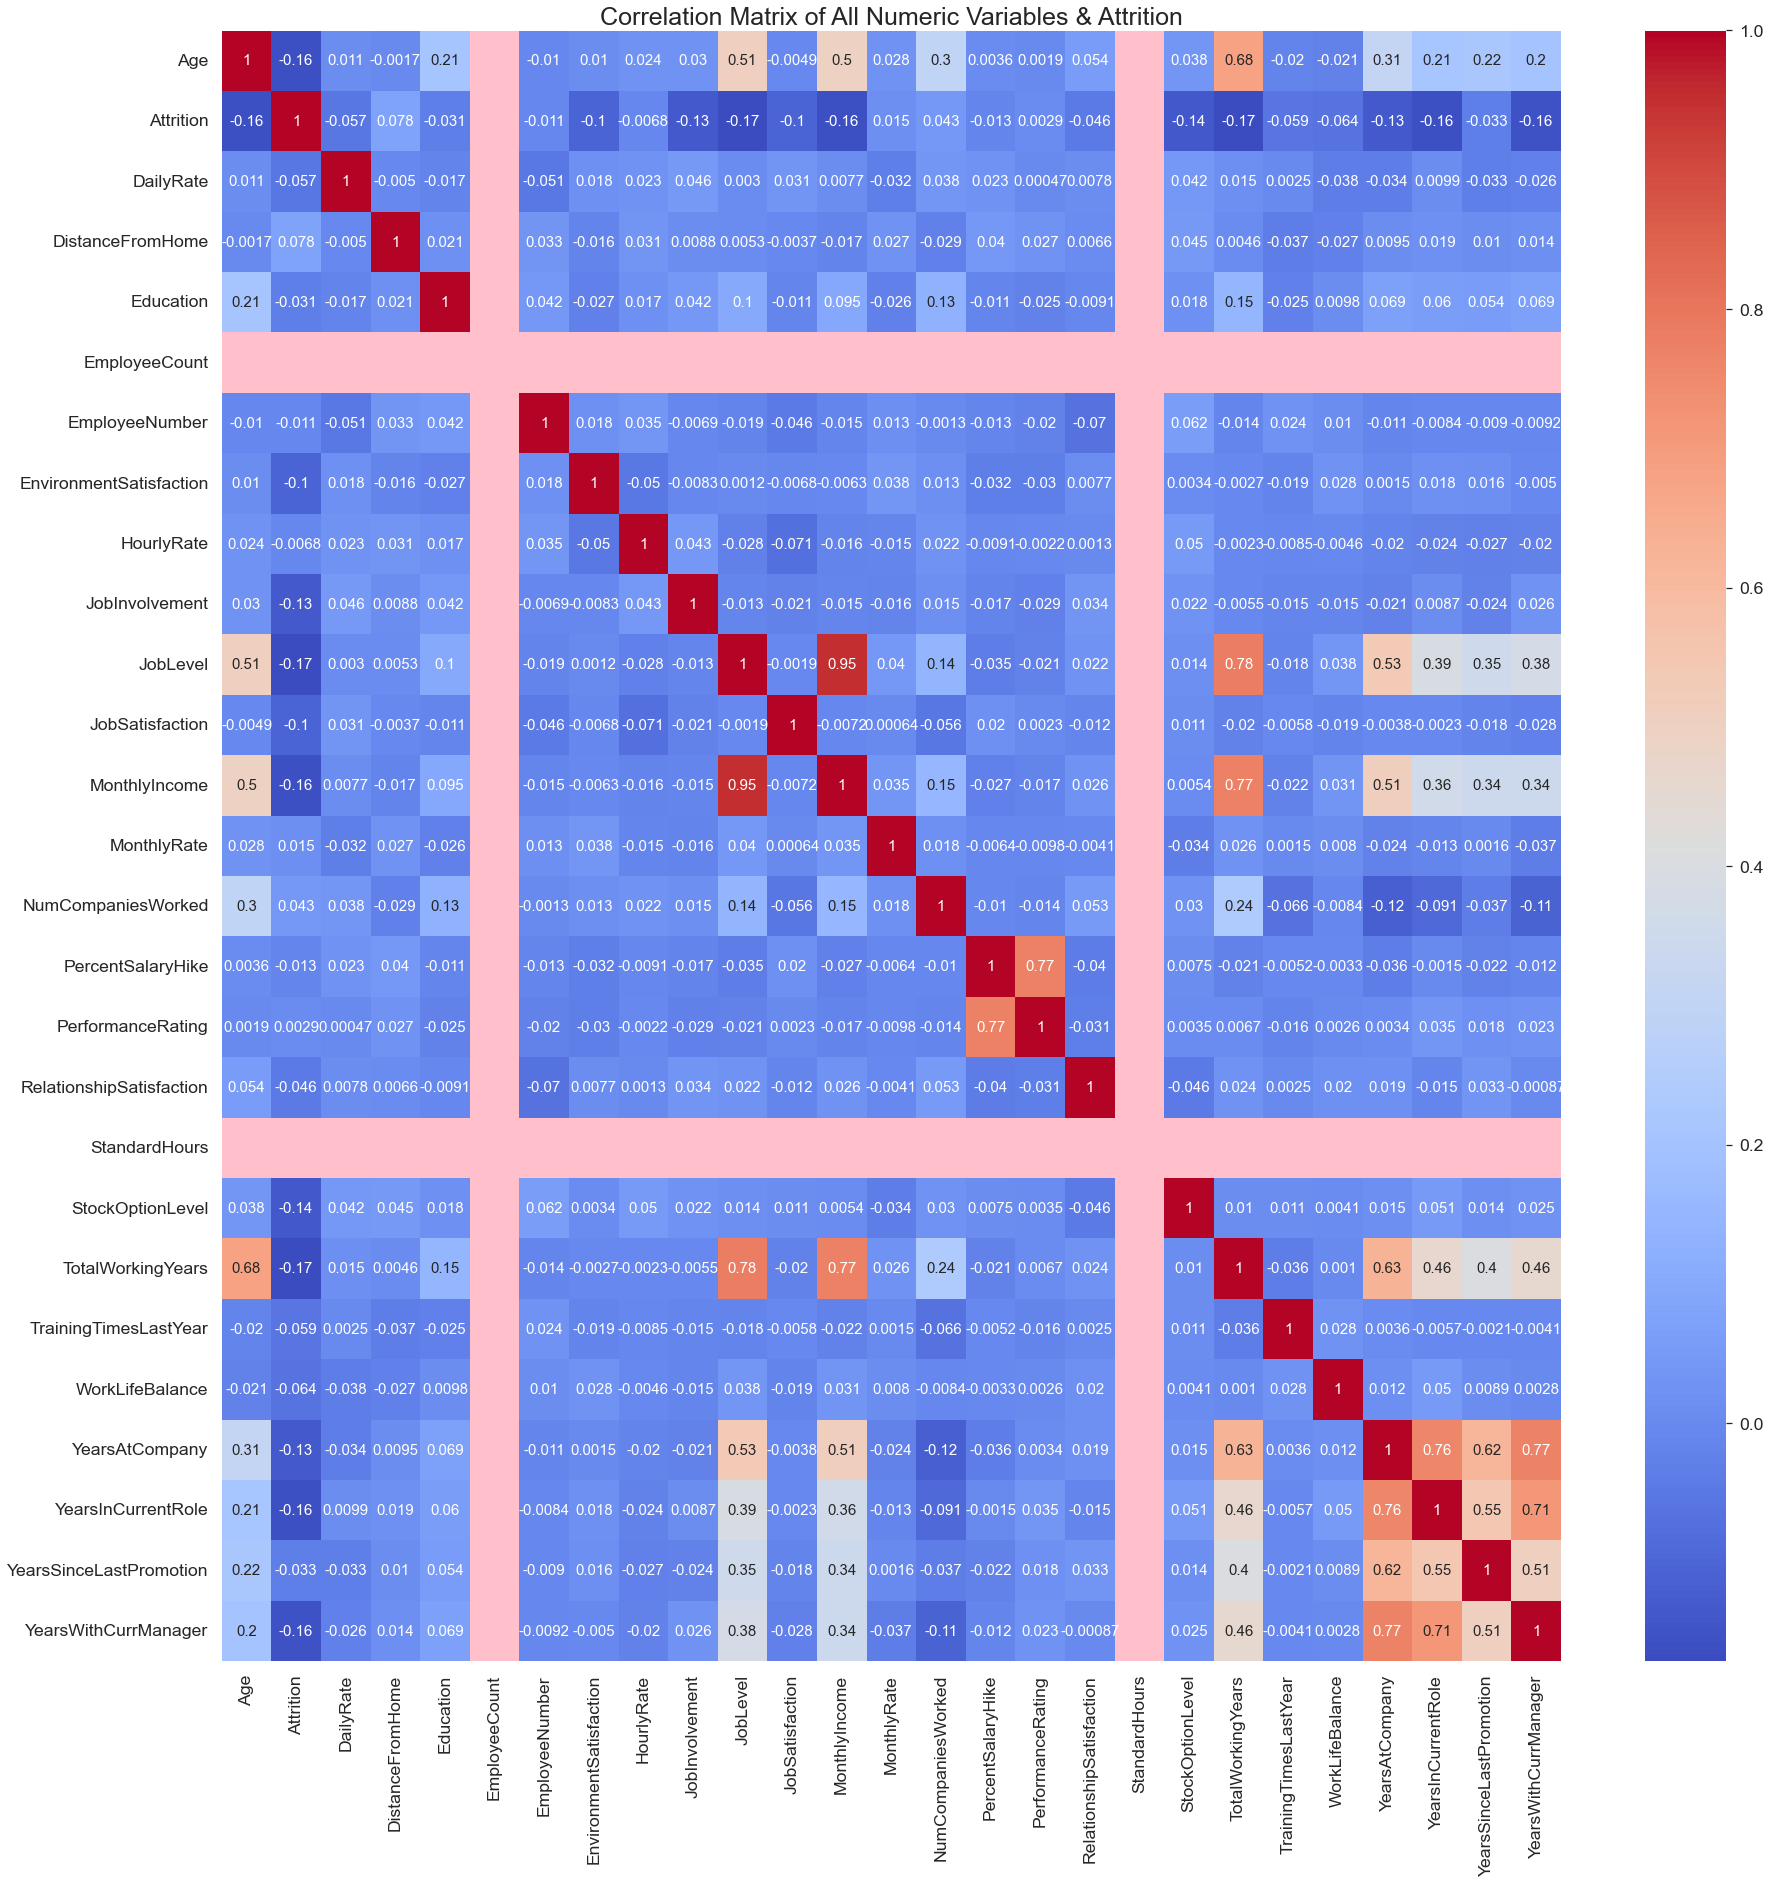

In [65]:
## Calculate the correlation matrix continued.

## Corelations.
corr = employee_df.corr()

## Plot the heatmap.
## Set color for potential bad values.
color = plt.get_cmap('coolwarm')   # default color
color.set_bad('pink')
sns.set(font_scale=1.6)
plt.figure(figsize=(30, 30))
corr_matrix = sns.heatmap(employee_df.corr(), annot=True, cmap=color, annot_kws={"size":15})
corr_matrix.set_title("Correlation Matrix of All Numeric Variables & Attrition", fontsize = 25)

First, from both of these graphical analyses, I can see that the values for EmployeeCount and StandardHours indicate bad values. I will want to look into this more to ascertain what is taking place. Additionally, after reviewing these correlation matrices, I will likely want to encode or obtain dummy variables for some of the other cateogorical variables that could be useful as independent variables in relation to the target/depdendent variable (Attrition). 

This may require some formatting/transformation/cleaning in an endeavor to ensure values are coming across/being read appropriately and accurately, so that will be part of my focus for Milestone 2.

Secondly, as far as correlations go, the outcomes indicate the following:
* No single variable has a significant relationship with Attrition alone/on its own, however:
    * MonthlyIncome is highly correlated with JobLevel and TotalWorkingYears.
    * MonthlyIncome is moderately correlated with Age and YearsAtCompany.
    * JobLevel is highly correlated with TotalWorkingHours and TotalWorkingYears.
    * JobLevel is moderately correlated with Age and YearsAtCompany.
    * TotalWorkingYears is highly correlated with Age, JobLevel, and MonthlyIncome.
    * TotalWorkingYears is moderately correlated with YearsAtCompany.
    * MonthlyIncome is highly correlated TotalWorkingHours.
    * YearsAtCompany is highly correlated with YearsInCurrentRole and YearsWithCurrManager.
    * YearsAtCompany is moderately correlated with YearsSinceLastPromotion.
    * YearsInCurrentRole is highly correlated with YearsAtCompany and YearsWithCurrManager.
    * YearsInCurrentRole is moderately correlated with YearsSinceLastPromotion.
    * YearsSinceLastPromotion is moderately correlated with YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager.
    * YearsWithCurrManager is highly correlated with YearsAtCompany and YearsInCurrentRole.
    * YearsWithCurrManager is moderately correlated with YearsSinceLastPromotion.

After Milestone 2, when I complete more cleansing and transformations on my dataset, I would like to assess the correlations again, but this grants me a pretty good picture of the relationships between variables. I would also like to consider and assess how multiple varibles in tandem influence Attrition, which really just boils down to my project problem focus.


#### Graphical Analysis 3: Plotting Distribution of Each Numeric Variable

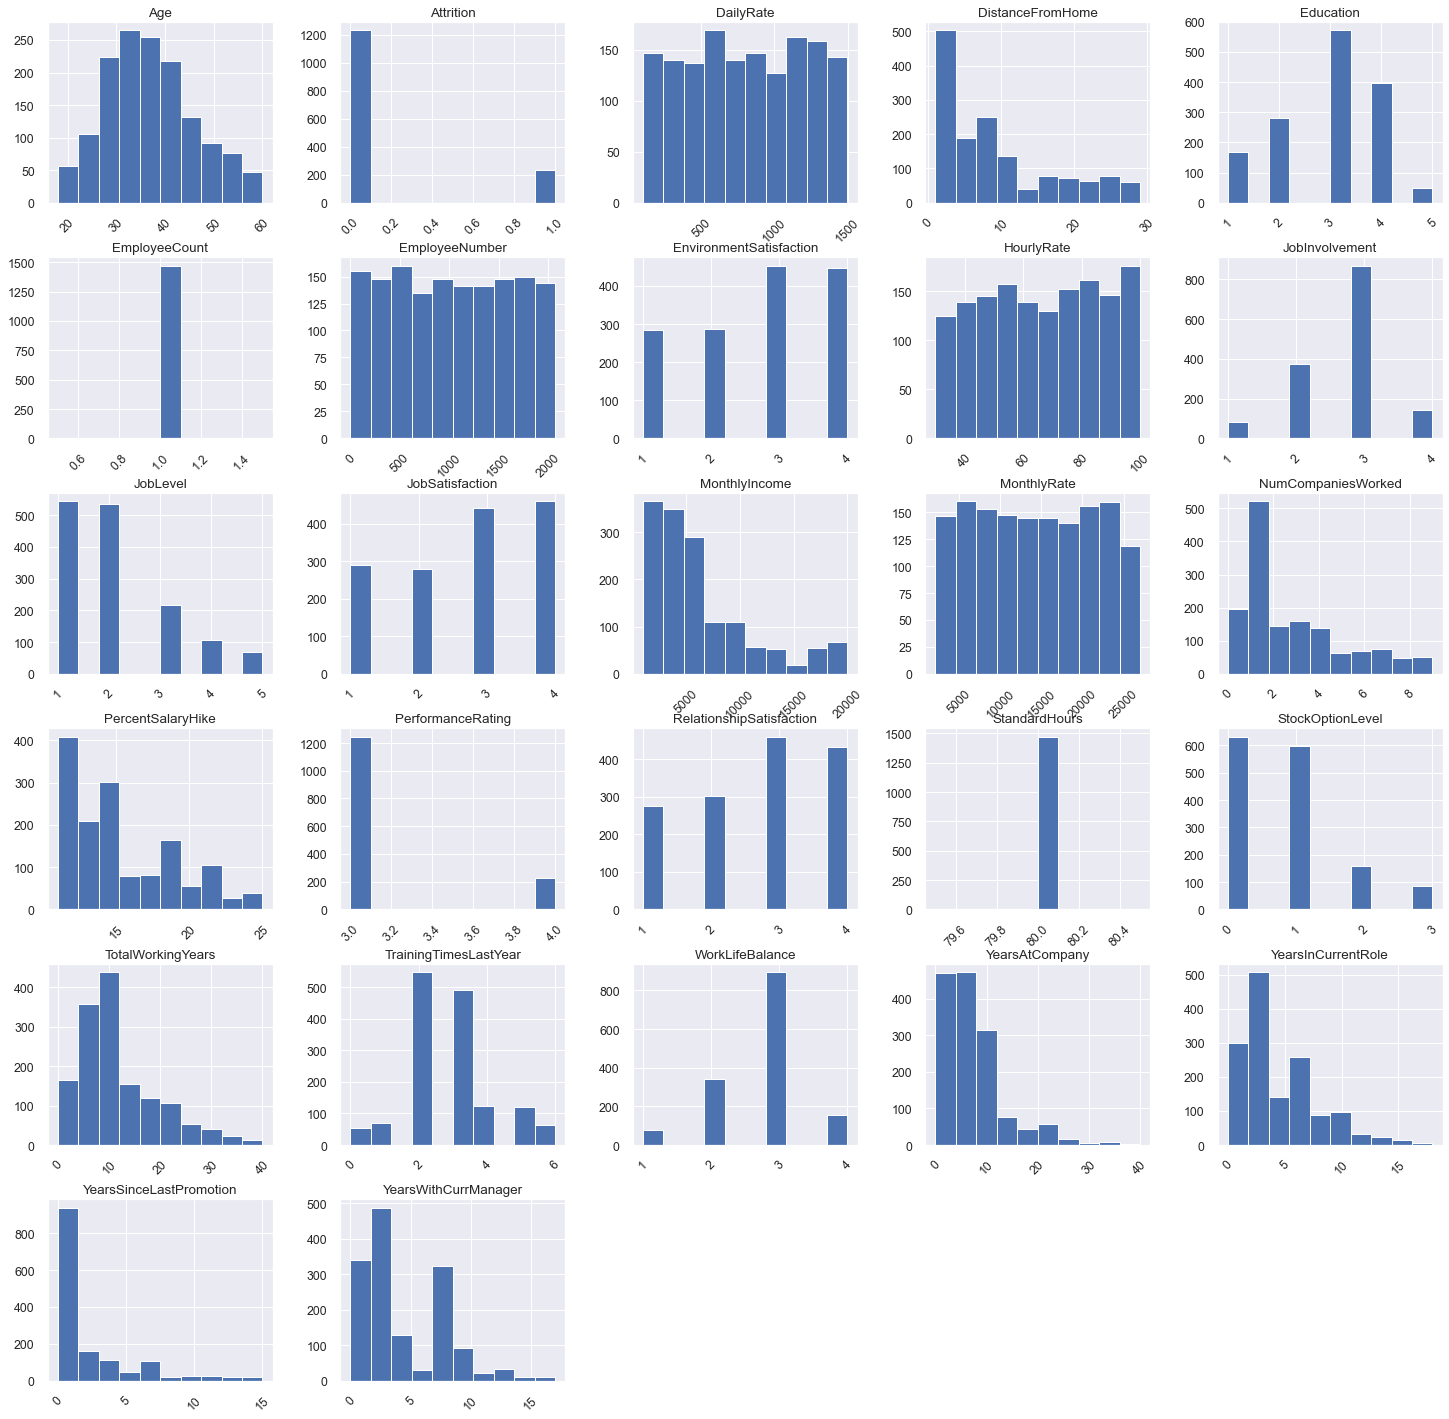

In [66]:
## Plotting distribution for each of the numeric variables.
sns.set(font_scale=1.12)
employee_df.hist(figsize=(25,25), xrot=45)
plt.show()

This graphical analysis is looking at the distribution of each of the numeric variables within the dataset. From these graphs, we can see/pick out some of the categorical variables that exist within the dataset (that use numerical digits to signify some category). Some of the variables, such as employee number, may not be useful for me in my overall project analysis.

#### Graphical Analysis 4: Attrition by Age (Distribution)

##### Update:

For the below histogram, I have increased the size of the histogram overall, as well as the font and legend sizing. This will make it easier to view and read.

#### Horizontal Histogram

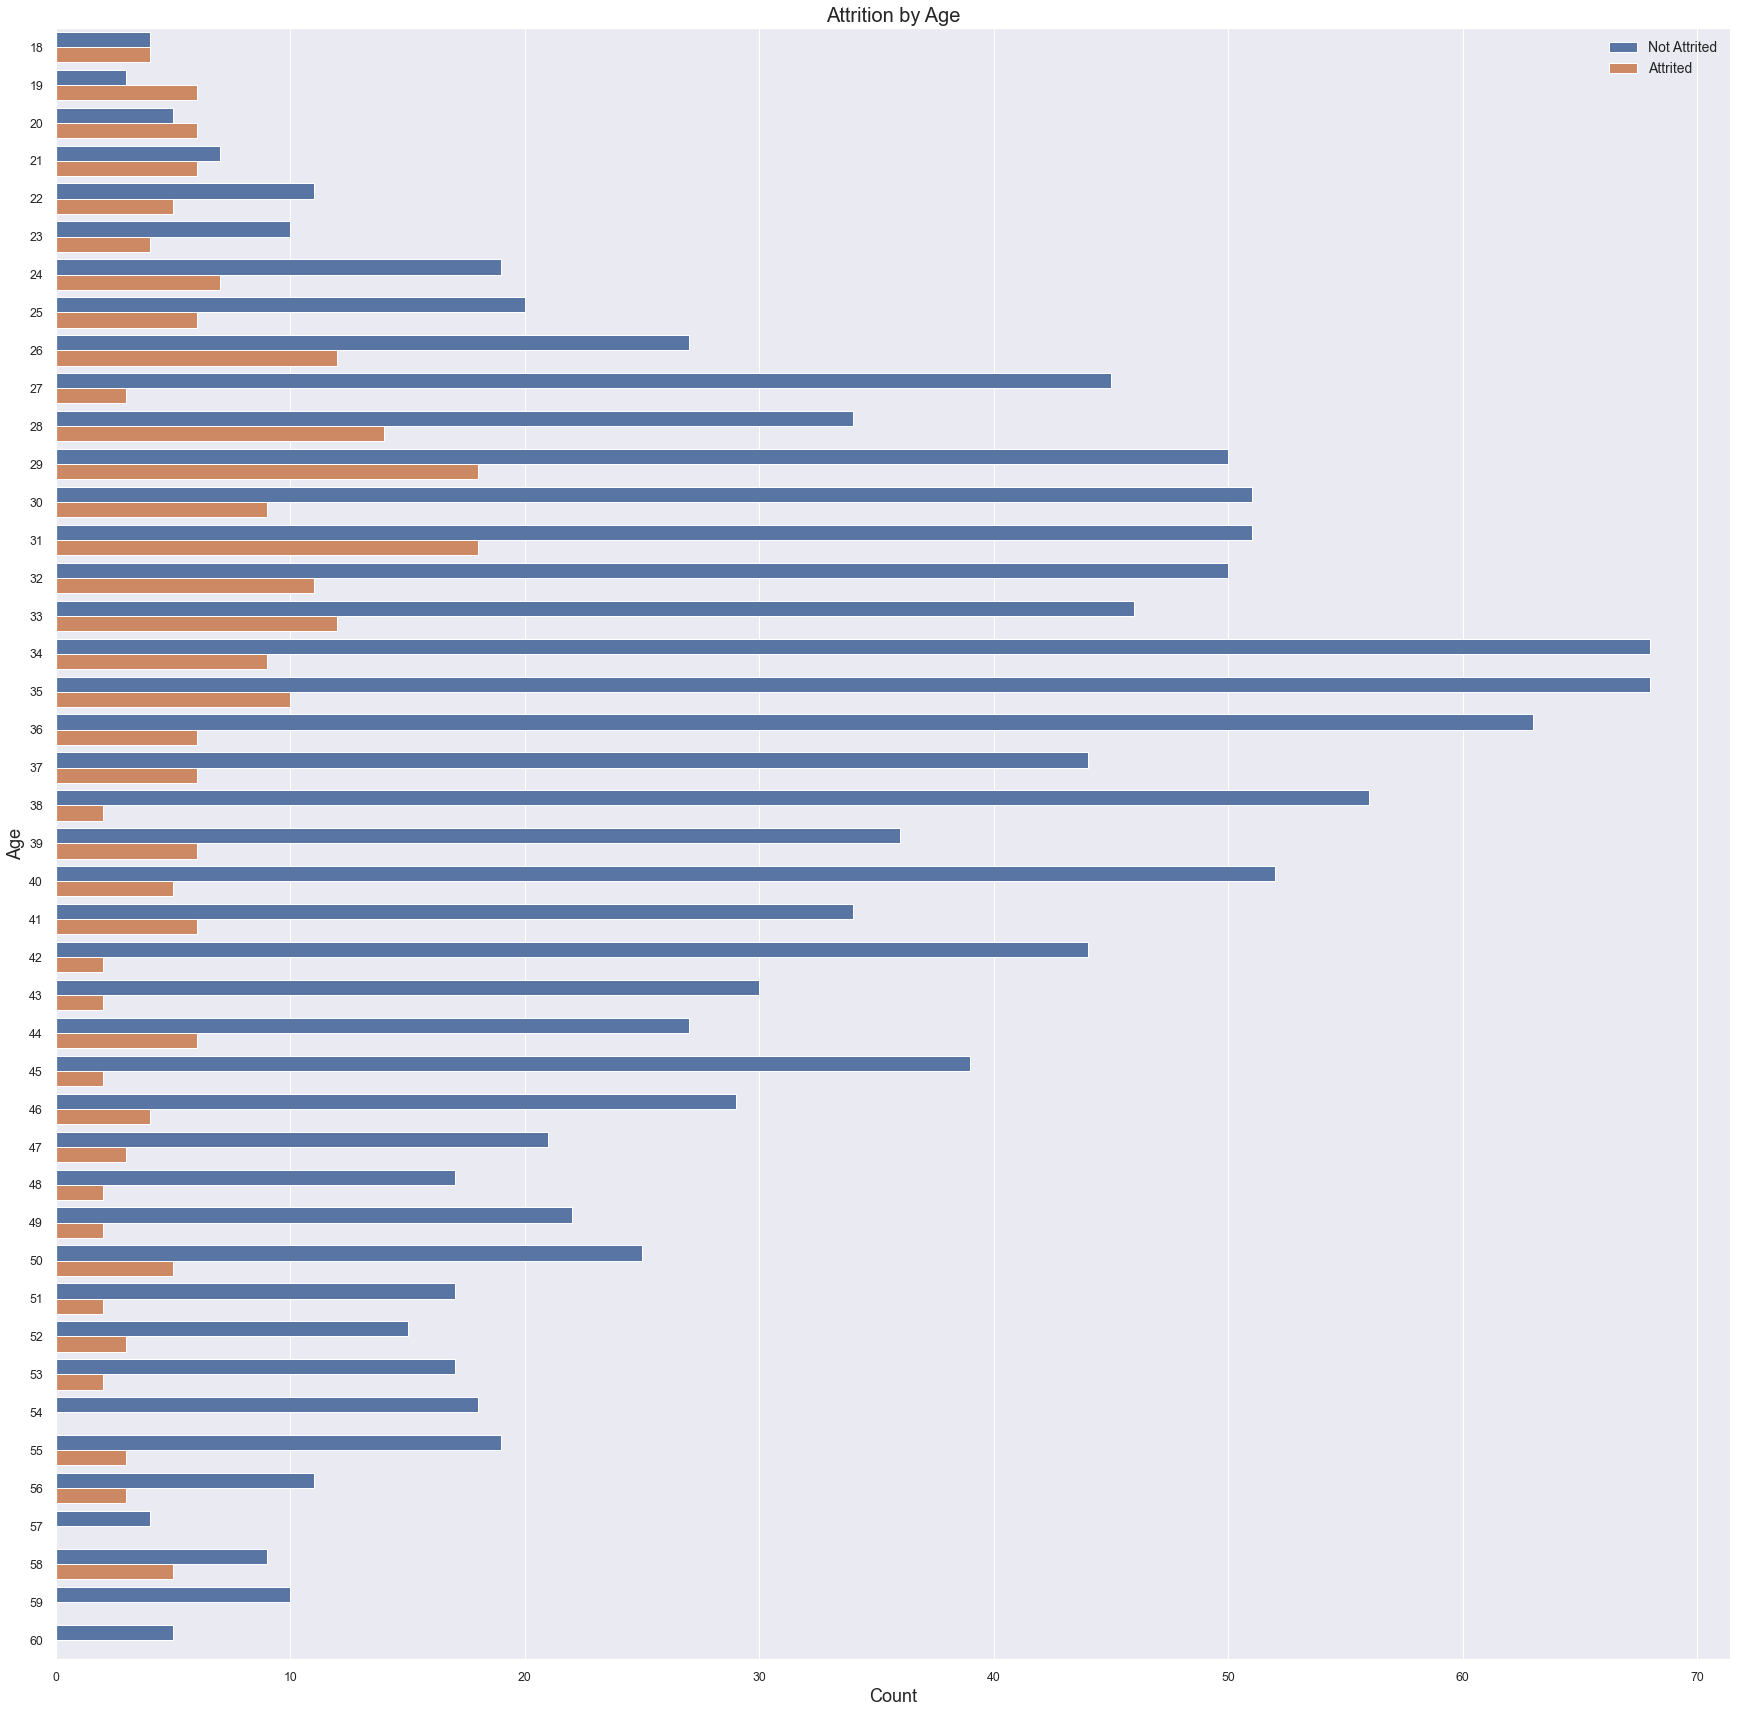

In [67]:
import plotly.express as px
from itertools import cycle
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
plt.figure(figsize=(30, 30))
labels=['Not Attrited', 'Attrited']

plot = sns.countplot(y="Age", hue="Attrition", data=employee_df)
sns.set(rc = {'figure.figsize':(25,18)})
plot.set_title("Attrition by Age", fontsize = 20)
plt.ylabel("Age", fontsize = 18)
plt.xlabel("Count", fontsize = 18)


h, l = plot.get_legend_handles_labels()
plot.legend(h, labels, fontsize = 14)
plt.show()

#### Vertical Histogram

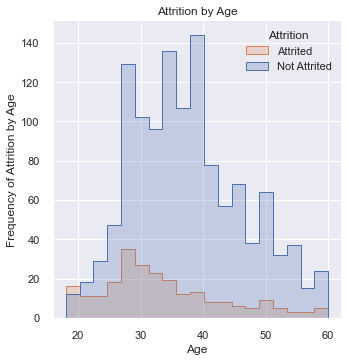

In [68]:
labels2 =['Attrited', 'Not Attrited']

plot2 = sns.displot(employee_df, x="Age", hue="Attrition", element="step", legend = False)
sns.set(rc = {'figure.figsize':(25,18)})
plt.title('Attrition by Age',fontsize=12)
plt.xlabel('Age')
plt.ylabel('Frequency of Attrition by Age')
plt.legend(labels2, title="Attrition")
plt.show()

This graphical analysis is taking a look at attrition by age. In these graphs, I can see that the data is a bit right-skewed, and the distribution indicates that the majority of attrition is concentrated within the 25-35 age range.

Overall, this is my initial EDA for my project. After completion of Milestone 2 (once the data is cleaned and formatted appropriately and how I would like), I know I will want to explore the data graphically a bit more.

From this graphical analysis, I have learned the following:
* I will need to encode some of the other categorical variables (besides just Attrition) so that I can run analyses on those variables to see how they may impact Attrition.
* I will want to remove certain variables that don't serve my project purposes.
* I will want to identify which variables are going to be my independent variables that impact my target or dependent variable (Attrition).

These graphical analyses have helped me to identify that, so far, with the numerical variables (and categorical numerical ones) present, no significant relationships exists between those and Attrition alone. However, a combination of variables may, and I am looking forward to training my ML model with multiple variables in tandem/combination.

### Milestone 2: Data Preparation

Now that you have created your idea, located data, and have started your graphical analysis, you will move on to the data preparation process of your project. After completing Milestone 2, your data should be ready for the model building/evaluation phase.
Here is a list of steps to consider performing in Milestone 2:

    Drop any features that are not useful for your model building and explain why they are not useful.
    Perform any data extraction/selection steps.
    Transform features if necessary.
    Engineer new useful features.
    Deal with missing data (do not just drop rows or columns without justifying this).
    Create dummy variables if necessary.

Explain your process at each step. You can use any methods/tools you think are most appropriate. Do what makes the most sense for your data/problem. This will vary greatly among different projects. Be careful to avoid data snooping in these steps.
It is important to note that these milestones are meant to keep you on track for the final project submission. At any point, you can pivot or modify your project as needed based on what you discover. These milestones are not final versions; they are drafts of the many steps you need to complete along the way.
As a reminder, Teams is a great place to discuss your project with your peers. Feel free to solicit feedback/input (without creating a group project!) and collaborate on your projects with your peers.
Each milestone will build on top of each other, so make sure you do not fall behind. Submit Milestones 1 & 2 together. I recommend building your project milestones in a Jupyter Notebook, building upon one another. However, make sure it is clear where Milestone 1 ends and Milestone 2 begins.


For this portion of the milestone, I will be focusing on preparing my data for analysis. Please see the below steps which describe how I will traverse through this process.

In [69]:
## View the data again.
pd.set_option('display.max_columns', 100)
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [70]:
isinstance(employee_df, pd.DataFrame)

True

Step 1: Remove any columns that will not be of value to my analysis. 

The columns that I will be removing include:
* EmployeeCount: based on the dataset description, this is just a number that indicates that the employee is a single human individual - so I won't need this, as the value is the same for every employee (1). (As a side note, this variable was unable to be utilized in my correlation matrix and came across as a "bad value" because it is the same value for every single instance - 1.)
* EmployeeNumber: this variable is just an employee's ID number, so it will not have any use to me for this project.
* Over18: I already have an age variable, so I don't need this additional variable that is only Y/N for whether an employee is over the age of 18.
* StandardHours: from our EDA, we can see that every employee is labeled as having standard hours as 80 (2-week period), so there is no variation here to potentially impact any model outcomes. The values are all the same. (As a side note, this variable was unable to be utilized in my correlation matrix and came across as a "bad value" because it is the same value for every single instance - 80.)

In [71]:
## Remove columns that won't be of any value to my analysis. 
employee_df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis='columns', inplace = True)

In [72]:
isinstance(employee_df, pd.DataFrame)

True

In [73]:
## View data.
employee_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7


Step 2: Replace column headers with a more standardized and readable/consistent format.

I tend to have a standardized way that I like to keep my column headers (format: word_word) as it helps when working with naming schemas and doing any combining, analyses, etc. 

In [74]:
## Replace column headers to a more standardized and readable/consistent format. 
employee_df.rename(columns={"Age": "age", "Attrition": "attrition", "BusinessTravel": "business_travel", "DailyRate": "daily_rate", "Department": "department", 
                            "DistanceFromHome": "distance_from_home", "Education": "education", "EducationField": "education_field", "EnvironmentSatisfaction": 
                            "environment_satisfaction", "Gender": "gender", "HourlyRate": "hourly_rate", "JobInvolvement": "job_involvement", "JobLevel": "job_level",
                           "JobRole": "job_role", "JobLevel": "job_level", "JobSatisfaction": "job_satisfaction",
                           "MaritalStatus": "marital_status", "MonthlyIncome": "monthly_income", "MonthlyRate": "monthly_rate", "NumCompaniesWorked":
                           "num_companies_worked", "OverTime": "over_time", "PercentSalaryHike": "percent_salary_hike",
                           "PerformanceRating": "peformance_rating", "RelationshipSatisfaction": "relationship_satisfaction","StockOptionLevel": "stock_option_level",
                           "TotalWorkingYears": "total_working_years", "TrainingTimesLastYear": "training_times_lastyear",
                           "WorkLifeBalance": "work_life_balance", "YearsAtCompany": "years_at_company",
                           "YearsInCurrentRole": "years_current_role", "YearsSinceLastPromotion": "years_since_last_promotion",
                           "YearsWithCurrManager": "years_with_current_manager"}, inplace=True)

## View columns to ensure formatting.
employee_df.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'peformance_rating', 'relationship_satisfaction',
       'stock_option_level', 'total_working_years', 'training_times_lastyear',
       'work_life_balance', 'years_at_company', 'years_current_role',
       'years_since_last_promotion', 'years_with_current_manager'],
      dtype='object')

In [75]:
## View the data.
employee_df.head(10)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,peformance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_lastyear,work_life_balance,years_at_company,years_current_role,years_since_last_promotion,years_with_current_manager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7


Step 3: Assess and handle any missing data.

First, I want to see what (if any) missing data exists within my dataset. If missing data exists, I will determine how I need to handle it throughout the next steps based on the kind of missing data. If not, then I will move on to the next step.

In [76]:
## Assess missing data.
## Find null values.
employee_df.isnull().values.any()

False

No missing data exists in this dataset, so I will not need to handle any missing values.

##### Update:

For the below step, I have commented it out, as I went ahead and completed this step in Milestone 1, prior to encoding my Attrition variable so that it could be accurately represented in my EDA.

Step 4: Extract out the target variable from the rest of the dataset.

This is to prepare my dataset for any model training and testing to come in later steps. My target variable is attrition.

In [77]:
## Extract/separate target variable (attrition) into its own dataframe.
## This variable has already been assigned dummy variables and the values have been "categorized".
## This took place in Milestone 1, EDA - in order to use my target variable for EDA I had to encode it categorically.
## employee_target_df = employee_df['attrition']
## employee_target_df

In [78]:
## Drop the target variable (attrition) from the main dataset.
## employee_df.drop('attrition', axis='columns', inplace = True)

In [79]:
## employee_df.head(10)

Step 5: Ensure that the appropriate variables are considered numeric, while those that need to be categorical are assigned as such also.

This will help prepare the data for dummy creation.

Some of my variables will be numeric and some will be categorical. See below for the variable classifications:

* age,                            numeric
* business_travel,                 categorical
* daily_rate,                      numeric
* department,                      categorical
* distance_from_home,              numeric
* education,                       categorical
* education_field,                 categorical
* environment_satisfaction,        numeric
* gender,                          categorical
* hourly_rate,                     numeric
* job_involvement,                 numeric
* job_level,                       categorical
* job_role,                        categorical
* job_satisfaction,                numeric
* marital_status,                  categorical
* monthly_income,                  numeric
* MonthlyRate,                     numeric
* num_companies_worked,            numeric
* over_time,                       categorical
* percent_salary_hike,             numeric
* peformance_rating,               numeric
* relationship_satisfaction,      numeric
* stock_option_level,              categorical
* total_working_years,             numeric
* training_times_lastyear,         numeric
* work_life_balance,               numeric
* years_at_company,                numeric
* years_current_role,              numeric
* years_since_last_promotion,      numeric
* years_with_current_manager,      numeric

In [80]:
## Check data types.
employee_df.dtypes

age                            int64
attrition                      int64
business_travel               object
daily_rate                     int64
department                    object
distance_from_home             int64
education                      int64
education_field               object
environment_satisfaction       int64
gender                        object
hourly_rate                    int64
job_involvement                int64
job_level                      int64
job_role                      object
job_satisfaction               int64
marital_status                object
monthly_income                 int64
monthly_rate                   int64
num_companies_worked           int64
over_time                     object
percent_salary_hike            int64
peformance_rating              int64
relationship_satisfaction      int64
stock_option_level             int64
total_working_years            int64
training_times_lastyear        int64
work_life_balance              int64
y

It looks like all of the data variables I need to be numeric are assigned as such already. However, there are three vaiables marked as numeric that I need to convert to categorical:

* education
* job_level
* stock_option_level

I also want to convert all of the object variables to be categorical.

##### Update:

For the below steps, I have commented them out, as it was necessary for Milestone 2, but once I completed Milestone 3, I essentially moved this step to that section. 

I utilized this for creating dummy variables for my categorical features, but once Milestone 3 came around, it made more sense to complete this step there, as Milestone 3 involves the splitting of the training and testing data. Essentially, I will separate the categorical and numeric, create dummy variables, and concatenate back together in the M3 section.

In [81]:
## Ensure data that needs to be read as numerical is done as such.
## Ensure the same for categorical variables. 

## for col in ['business_travel', 'department', 'education', 'education_field', 'job_level', 'stock_option_level',
           ## 'gender', 'job_role', 'marital_status', 'over_time']:
    ## employee_df[col] = employee_df[col].astype('category')

In [82]:
## Recheck data types.
## employee_df.dtypes

In [83]:
## Create dummy variables for all of the categorical variables in the employee_df dataframe.

## pd.get_dummies(employee_df, columns=['business_travel', 'department', 'education', 'education_field', 'job_level', 'stock_option_level',
           ## 'gender', 'job_role', 'marital_status', 'over_time']).head()

Final statements for Milestone 2:

Overall, this dataset is in good shape for being ready to use for model training and testing. I want to use each of the variables (other than the target variable - attrition) for the training and testing, and wish to use them all as features (similar to how it was done in the mushroom dataset assignment we had last week). Of course, as part of my later analysis, I may complete further analysis with the best 5 features (again, like how was done in Week 7's assignment) but if so, that will take place in my analysis portion.

### Milestone 3: Model Building and Evaluation

In Milestone 3, you will begin the process of selecting, building, and evaluating a model. You are required to train and evaluate at least one model in this milestone. Write step-by-step for performing each of these steps. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose. It is important to think about what type of model and metric makes sense for your problem. Again, do what makes the most sense for your project. Write a short overview/conclusion of the insights gained from your model building/evaluation.

In [84]:
## Import necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import yellowbrick
import csv

## Used to split data into training/testing sets.
from sklearn.model_selection import train_test_split

## Used for plotting confusion matrices.
from sklearn.metrics import plot_confusion_matrix

## Used for evaluation metrics.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Scalers.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## One-hot encoder.
from sklearn.preprocessing import OneHotEncoder

## PCA library.
from sklearn.decomposition import PCA

## Linear regression.
from sklearn.linear_model import LinearRegression

In [85]:
employee_df.head(20)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,peformance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_lastyear,work_life_balance,years_at_company,years_current_role,years_since_last_promotion,years_with_current_manager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7


In [86]:
## Split the data.
x = employee_df.drop(['attrition'], axis = 'columns')
y = employee_df['attrition']

In [87]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: attrition, Length: 1470, dtype: int64


In [88]:
## Training and test sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [89]:
## View the shape.
print(x_train.shape)
print(x_test.shape)

(1029, 30)
(441, 30)


In [90]:
## Split columns into numerical and categorical training and testing sets.
xtrain_num = x_train[x_train.columns[x_train.dtypes != 'object']]
xtest_num = x_test[x_train.columns[x_train.dtypes != 'object']]
xtrain_cat = x_train[x_train.columns[x_train.dtypes == 'object']]
xtest_cat = x_test[x_train.columns[x_train.dtypes == 'object']]

In [91]:
## Convert categorical variables to dummy.
## This was part of the end of Milestone 2, however...
## I am updating how I am doing this based upon how I am doing my train/test splitting.

## Use the OneHotEncoder to complete this step.
encoder = OneHotEncoder(handle_unknown = 'ignore')

## Fit and transform to the encoder.
xtrain_encoder = encoder.fit_transform(xtrain_cat)
xtest_encoder = encoder.transform(xtest_cat)

print(xtrain_encoder.shape)
print(xtest_encoder.shape)

(1029, 28)
(441, 28)


In [92]:
## Concatenate numerical and encoded (categorical dummy) features.
xtrain_num.reset_index(drop=True, inplace=True)
xtest_num.reset_index(drop=True, inplace=True)
xtrain_final = pd.concat([xtrain_num, pd.DataFrame(xtrain_encoder.toarray())], axis = 1)
xtest_final = pd.concat([xtest_num, pd.DataFrame(xtest_encoder.toarray())], axis = 1)

## View shape.
print(xtrain_final.shape)
print(xtest_final.shape)

(1029, 51)
(441, 51)


In [93]:
## Import necessary libraries for this portion that I may use. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

My dataset of choice is actually quite similar to the loan train one (N/Y), given that it is a classification dataset with only two options (0/1) for the target variable. This somewhat factors into how I have elected to handle training and testing my model.

In [94]:
## Initialize the various estimators.

clf1 = RandomForestClassifier()
clf2 = LogisticRegression(class_weight='balanced', solver='saga', max_iter=4000)
clf3 = DecisionTreeClassifier(random_state=42)
clf4 = KNeighborsClassifier()

In [95]:
## Initialize the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 100, 1000]
param1['classifier__max_features'] = [1, 2, 3]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__penalty'] = ['l1', 'l2']
param2['classifier__C'] = np.logspace(0, 4, 10)
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__max_depth'] = [5,10,25,None]
param3['classifier__min_samples_split'] = [2,5,10]
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__n_neighbors'] = [1,2,3,4,5,6,7,8,9,10]
param4['classifier'] = [clf4]

In [96]:
## Create pipeline.
pipeline = Pipeline([('classifier', clf1)])

## Create parameters.
params = [param1, param2, param3, param4]

In [97]:
%%time

## Grid Search CV.
## Train the grid search model.
gs = GridSearchCV(pipeline, params, cv=5, n_jobs=-1)
gs.fit(xtrain_final.values, y_train.values)

Wall time: 1min 6s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(max_features=3,
                                                               n_estimators=1000))]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(max_features=3,
                                                                n_estimators=1000)],
                          'classifier__max_features': [1, 2, 3],
                          'classifier__n_estimators': [10, 100, 1000]},
                         {'classifier': [LogisticRegression(class_weight='balanced',
                                                            ma...
       3.59381366e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [DecisionTreeClassifier(random_state=42)],
                          'classifier__class_weight': [None, {0: 1, 1: 5},
                      

In [98]:
## Best performing model and its corresponding hyperparameters
gs.best_params_

{'classifier': RandomForestClassifier(max_features=3, n_estimators=1000),
 'classifier__max_features': 3,
 'classifier__n_estimators': 1000}

In [99]:
y_pred = np.around(gs.predict(xtest_final.values))

In [100]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [101]:
## Model classification report.
print(classification_report(y_test.values, gs.best_estimator_.predict(xtest_final.values)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       373
           1       0.92      0.16      0.28        68

    accuracy                           0.87       441
   macro avg       0.89      0.58      0.60       441
weighted avg       0.87      0.87      0.83       441



In [102]:
## Model classification report, simply done another way to verify the information twice.
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       373
           1       0.92      0.16      0.28        68

    accuracy                           0.87       441
   macro avg       0.89      0.58      0.60       441
weighted avg       0.87      0.87      0.83       441



Model Accuracy: 86.85%


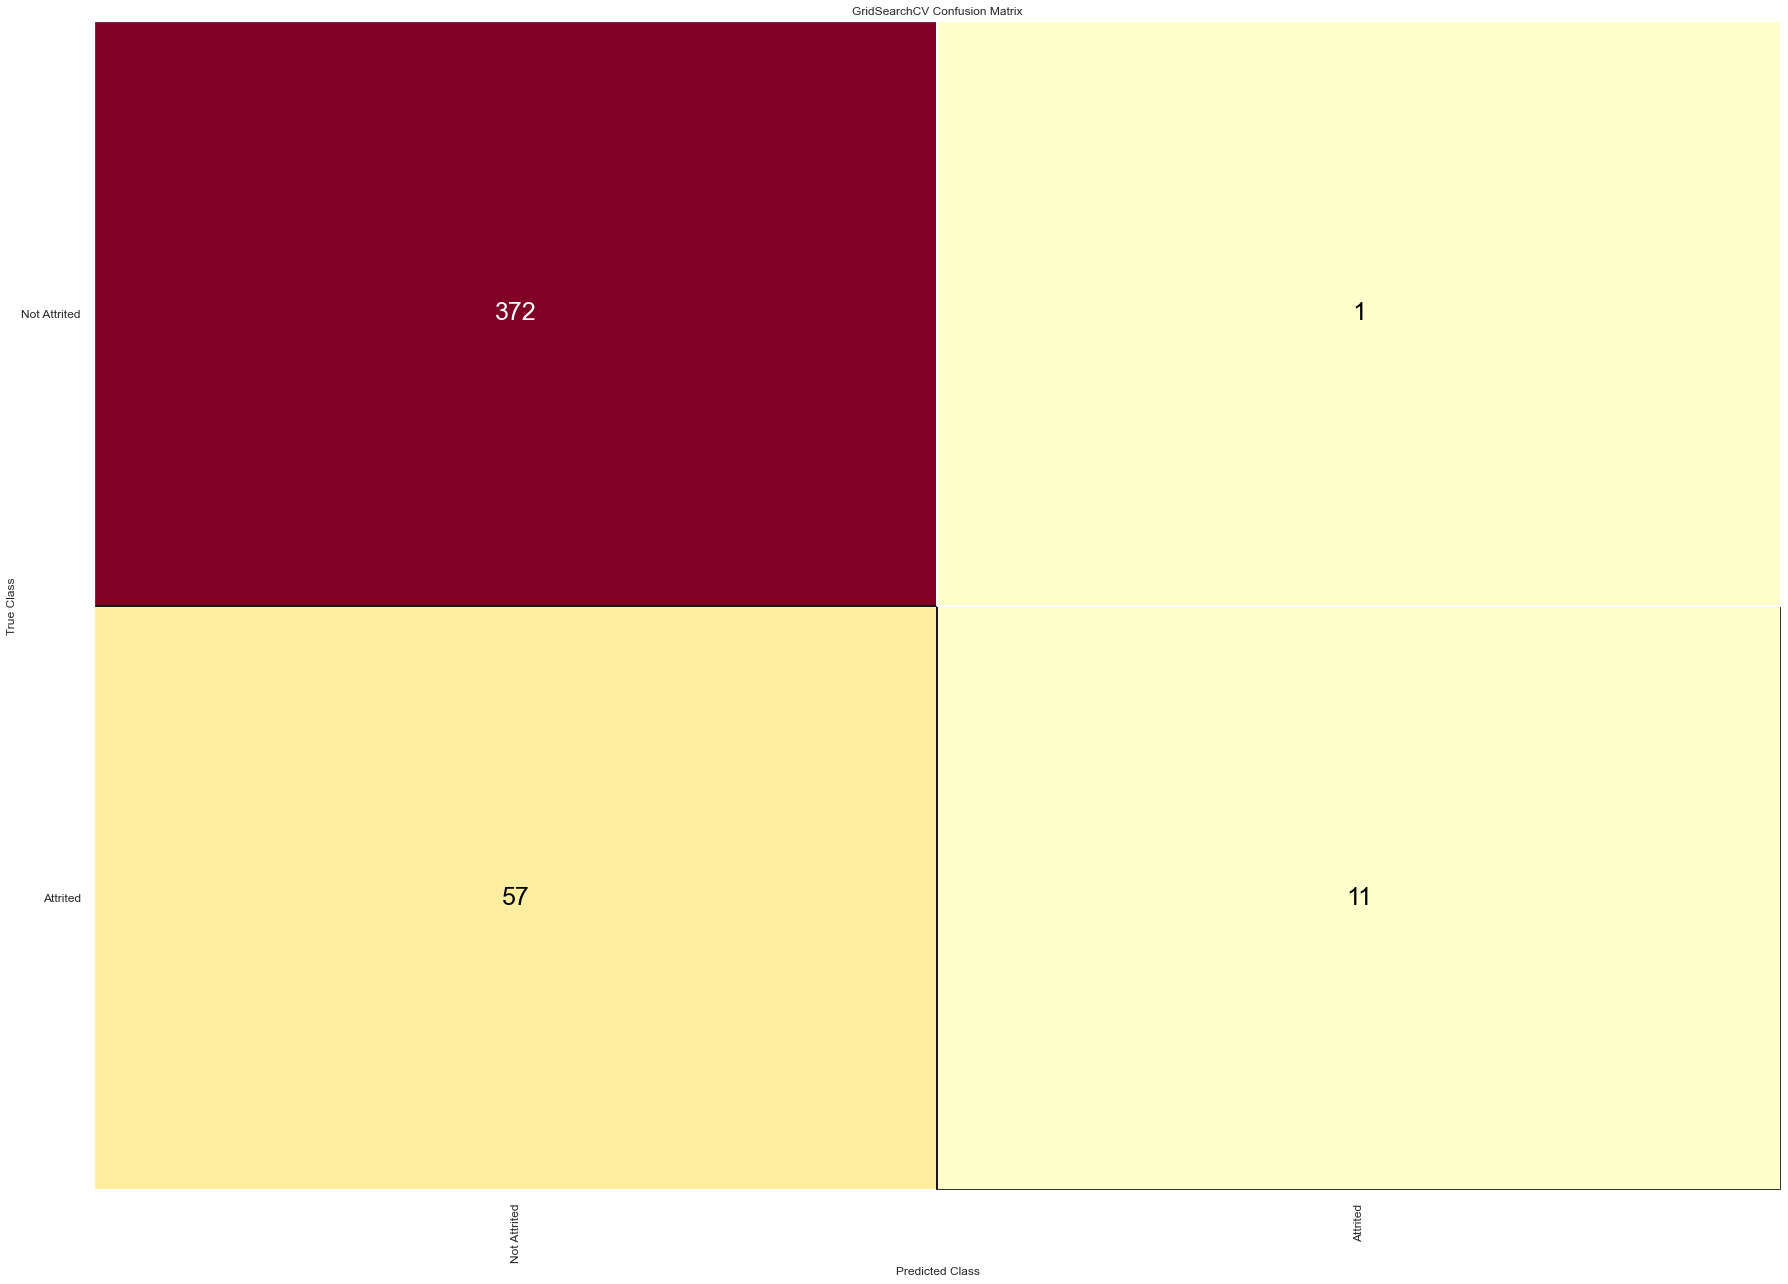

<AxesSubplot:title={'center':'GridSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [103]:
import yellowbrick
from sklearn.metrics import plot_confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

## Obtain model accuracy and create a confusion matrix.

## Create class labels for confusion matrix
## Classes = ['No','Yes']
label_encoder = {0: 'Not Attrited', 1: 'Attrited'}

## Initialize the confusion matrix
cm = ConfusionMatrix(gs, encoder = label_encoder, percent=False)

## Fit the test set to the confusion matrix
cm.fit(xtest_final.values, y_test.values)

## Creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(xtest_final.values, y_test.values)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

## Change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

## Display the confusion matrix
cm.show()

#### Discussions and Conclusion

Overall, based on previous work and concepts we have learned/completed as a part of this course with respect to classification data and models, I elected to test a model that included various hyperparameters in an endeavor to discover which model was best. 

The models that I used with the hyperparameters included random forest, logistic regression, decision tree, and knn. The reasoning for choosing these is that my dataset has data that I would like to classify, and these models are often used in that specific instance. The metrics/hyperparameters chosen were done so with keeping my dataset in mind - only about 1400 data points (rows).

From the results, I can ascertain that the model accuracy was 86.17%, with the best parameters from the grid search model being the below:

* RandomForestClassifier(max_features=2)
* classifier__max_features: 2
* classifier__n_estimators: 100

I am not inherently surprised by this, as I know random forest models tend to fit well for classification data and are good use-cases for those models. 

With respect to the classification report, we can ascertain that:

* Precision: 86% of the predictions were correct for the 0 class (Not Attrited) and 100% for the 1 class (Attrited).
* Recall: The percentage of positive cases caught/identified were 100% and 10%, respectively.
* F1: The percentage of positive predictions that were actually correct is 92% and 19%, respectively.
* Support: The number of actual occurences of the classes within the xtest dataset are 373 and 68, respectively.

In subsequent steps/prior to my official final submission, I may play around with the parameters even more, in an attempt to see if I can increase my model accuracy.

##### Update:

I added in an additional step of utilizing a SMOTE method for my model.
This is to balance the classes and so my model does not have as much of an issue predicting the attrited (minority) class.

In [104]:
## SMOTE as an additional data prep method.
## This is to balance the classes.
## Also so my model does not have as much of a problem predicting the minorty (attrited) class correctly.

## Import libraries.
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

In [105]:
## Transform the dataset.
## oversample = SMOTE()
## x, y = oversample.fit_resample(x,y)

sm = SMOTE(random_state = 42)
x_sm, y_sm = sm.fit_resample(xtrain_final.values, y_train.values)

## Info.
print(f'''Shape of X before SMOTE: {xtrain_final.shape}
Shape of X after SMOTE: {x_sm.shape}''')

Shape of X before SMOTE: (1029, 51)
Shape of X after SMOTE: (1720, 51)


Accuracy = 0.92
Recall = 0.87



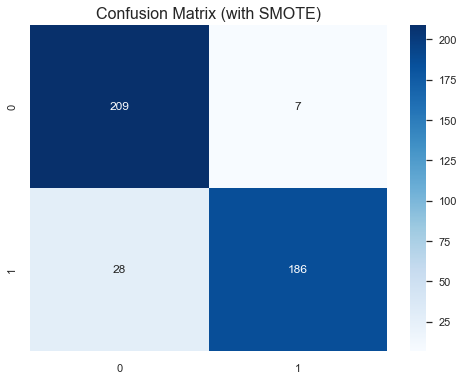

In [107]:
## New model with SMOTE.

x_train, x_test, y_train, y_test = train_test_split(
    x_sm, y_sm, test_size=0.25, random_state=42
)

gs.fit(x_train, y_train)
preds = gs.predict(x_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

From applying a SMOTE method to this data, we can see that both the model accuracy and recall improved, coming in at 94% and 90%, respectively.

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in a dataset in a balanced way. The component works by generating new instances from existing minority cases that are supplied as input.

##### Updates:

Throughout this assignment, you will notice "Update" sections/blurbs - these are notes that call-out where I have made an update to a previous milestone based upon feedback or additional research/term project work. In these sections, I explain what was polished up/amended prior to this final submission. The headers for these sections look like the below:

##### "Update:

Notes/text here..."

Overall, I enjoyed this project – it granted me a healthy amount of experience with machine learning techniques, and I look forward to the ways in which I will use the skills and experiences I have garnered from this course in the future.